# Exploratory Data Analysis on Lending Club Case Study

## Introduction

*When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Our aim is to __identify patterns that indicate if a person is likely to default__ using loan data issued through the time period 2007 - 2011*

## Contents:

 - Import Libraries
 - Read Data
 - Predictions
 - Data CLeaning
   - Missing Value Treatment
 - Data Imputation
 - Derived Columns
 - Categorical Features
 - Numerical Features
 - Detecting Outliers
 - Relation between Numeric Variables
 - Data Analysis
   - Univariate Analysis
   - Bivariate Analysis

### Import Libraries

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
# Read the csv file
loan = pd.read_csv('loan.csv', low_memory=False)

In [3]:
# Shape
loan.shape

# 39,717 rows and 111 columns

(39717, 111)

In [4]:
# Preview of the data
loan.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
8862,859402,1072046,11000,11000,11000.0,36 months,11.99%,365.31,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3553,1016647,1244565,18000,18000,18000.0,36 months,11.71%,595.37,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
10650,829342,1038442,7450,7450,7200.0,36 months,15.62%,260.53,D,D1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
916,1058484,1290072,7200,7200,7200.0,36 months,20.89%,270.86,F,F1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
31085,498915,640094,4800,4800,4725.0,36 months,7.51%,149.33,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### List of features

In [5]:
# Get a list of the features within the dataset
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Preliminary Predications

 - *Records with loan status, 'Current', are not considered for analysis as it doesn't give sufficient information as to whether the the customer will become a defaulter or not.*
 - *Customer behaviour attributes like 'delinquent 2 yrs', 'revolving balance', 'next payment date'..., are ignored for analysis as they are generated after a loan is approved.*

### Data Cleaning

#### *Remove records with loan_status = 'Current' as it cannot really tell if the applicant is a defaulter or not*

In [6]:
loan_fc = loan[~loan['loan_status'].isin(['Current'])]
loan_fc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Verify removal of records of 'current' loan status
loan_fc['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

##### Remove columns related to customer behaviour

In [8]:
customer_behaviour_attributes = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [9]:
loan_fc.drop(columns=customer_behaviour_attributes, inplace=True)
loan_fc.shape

(38577, 90)

In [10]:
loan_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 90 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38577 non-null  int64  
 1   member_id                       38577 non-null  int64  
 2   loan_amnt                       38577 non-null  int64  
 3   funded_amnt                     38577 non-null  int64  
 4   funded_amnt_inv                 38577 non-null  float64
 5   term                            38577 non-null  object 
 6   int_rate                        38577 non-null  object 
 7   installment                     38577 non-null  float64
 8   grade                           38577 non-null  object 
 9   sub_grade                       38577 non-null  object 
 10  emp_title                       36191 non-null  object 
 11  emp_length                      37544 non-null  object 
 12  home_ownership                  

##### Clean up columns with all NA values

In [11]:
# Remove columns that have only NA values
loan_fc.dropna(axis=1, how='all', inplace=True)
loan_fc.shape

(38577, 35)

In [12]:
loan_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

##### Calculate missing values in %

In [13]:
loan_fc.isna().sum()/len(loan_fc)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.472717
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


##### Remove records with over 60% missing values

Imputation might lead to an increased noise for these features

In [14]:
loan_fc.drop(columns=['mths_since_last_delinq','mths_since_last_record'], inplace=True)
loan_fc.shape

(38577, 33)

##### Find duplicates in 'id' column

In [15]:
loan_fc.duplicated(subset=['id']).sum()
# No duplicates

0

##### Remove '%' from int_rate

In [16]:
loan_fc.int_rate = loan_fc.int_rate.apply(lambda x: float(x[:-1]))
loan_fc.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

##### Remove other columns that do not add value to our analysis

Remove *'id', 'member_id', 'url', 'pymnt_plan', 'initial_list_status', 'policy_code', 'zip_code'...* columns as they do not add any value to our analysis

In [17]:
loan_fc.drop(columns=['id','member_id','url', 'pymnt_plan','zip_code', 'initial_list_status', 'policy_code', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','collections_12_mths_ex_med','emp_title','desc','title'], inplace=True)

### Data Imputation

In [18]:
loan_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

*Here, 2 columns, 'emp_length' and 'pub_rec_bankruptcies' have some missing values*

##### Fill the gaps in emp_length

In [19]:
loan_fc.emp_length.isna().sum()

# It has 1033 missing values (NaN)

1033

In [20]:
loan_fc.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

In [21]:
# Fill the NaN records with 'Not Available'
loan_fc.emp_length.fillna(value='Not Available', inplace=True)

##### Fill the gaps in pub_rec_bankruptcies

In [22]:
loan_fc.pub_rec_bankruptcies.isna().sum()

697

In [23]:
loan_fc.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36238
1.0     1637
NaN      697
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
loan_fc.pub_rec_bankruptcies.fillna(value='Not Available', inplace=True)

##### Convert from object to Category type

In [26]:
loan_fc['loan_status'] = loan_fc['loan_status'].astype('category')

loan_fc.verification_status = loan_fc.verification_status.astype('category')

loan_fc.term = loan_fc.term.astype('category')

loan_fc.grade = loan_fc.grade.astype('category')

loan_fc.sub_grade = loan_fc.sub_grade.astype('category')

loan_fc.emp_length  = loan_fc.emp_length .astype('category')

loan_fc.pub_rec_bankruptcies  = loan_fc.pub_rec_bankruptcies .astype('category')

loan_fc.home_ownership  = loan_fc.home_ownership .astype('category')

loan_fc.purpose  = loan_fc.purpose .astype('category')

loan_fc.addr_state  = loan_fc.addr_state .astype('category')

In [27]:
loan_fc.issue_d = pd.to_datetime(loan_fc.issue_d, format ='%b-%y')

In [28]:
# Check for any more null records
loan_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  category      
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   emp_length            38577 non-null  category      
 9   home_ownership        38577 non-null  category      
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  category      
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status     

### Derived Columns

##### Extract Year & Month from the loan issue date

In [29]:
loan_fc.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

##### Year

In [30]:
import datetime 
loan_fc['Year'] = loan_fc['issue_d'].map(lambda x: x.year)
loan_fc['Year'].head()

0    2011
1    2011
2    2011
3    2011
5    2011
Name: Year, dtype: int64

##### Month

In [31]:
loan_fc['Month'] = loan_fc['issue_d'].map(lambda x: x.month)
loan_fc['Month'].head()

0    12
1    12
2    12
3    12
5    12
Name: Month, dtype: int64

##### Split up loan amount into categories

In [32]:
# Split loan amounts into 5 categories
loan_fc['loan_amnt_category'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, np.inf], labels=['0-7k', '7k-14k', '14k-21k', '21k-28k', '28k+'])

##### Split up annual income into categories

In [33]:
# Split annual incomes into 5 categories
loan_fc['annual_inc_category'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,np.inf], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k+'])

##### Split up interest rates into categories

In [35]:
# Split interest rates into 4 categories
loan_fc['int_rate_category'] = pd.cut(loan_fc['int_rate'], [0, 5, 10, 15, 20], labels=['0-5%', '5-10%', '10-15%', '15%+'])

##### Split dti into 5 categories

In [36]:
# Split dti into 5 categories
loan_fc['int_rate_category'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])

### Features Split-up

In [37]:
loan_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  category      
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   emp_length            38577 non-null  category      
 9   home_ownership        38577 non-null  category      
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  category      
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status     

In [38]:
loan_fc.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                          category
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                    category
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                   category
purpose                       category
addr_state                    category
dti                            float64
pub_rec_bankruptcies          category
Year                             int64
Month                            int64
loan_amnt_category            category
annual_inc_category           category
int_rate_category             category
dtype: object

### Categorical Features

In [39]:
# loan_fc.dtypes[loan_fc.dtypes == 'category']

 - 'term'
 - 'grade'
 - 'sub_grade'
 - 'emp_length'
 - 'home_ownership'
 - 'verification_status'
 - 'loan_status'
 - 'purpose'
 - 'addr_state'
 - 'pub_rec_bankruptcies'

#### Numercial Features

- loan_amnt
- funded_amnt
- funded_amnt_inv
- int_rate
- installment
- annual_inc
- dti
- pub_rec_bankruptcies
- Year
- Month

### Detecting Outliers

##### Loan Amount

In [40]:
loan_fc['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

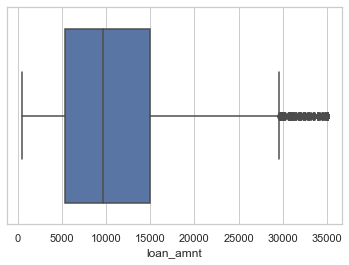

In [41]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=loan_fc.loan_amnt)

*We see outliers when the loan amount is higher than 30,000 and they are not too extreme.*

##### Annual Income

In [42]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [43]:
loan_fc['annual_inc'].describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

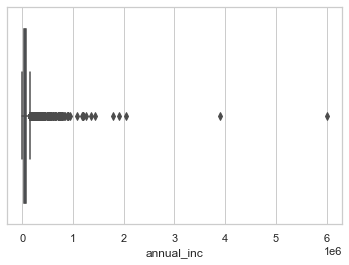

In [44]:
sns.boxplot(x=loan_fc.annual_inc)

- *Upto 75% of annual income fall under 82000.*
- *There are extreme outliers beyond the annual Income of 200,000*

##### Remove outliers from annual income

<AxesSubplot:xlabel='annual_inc'>

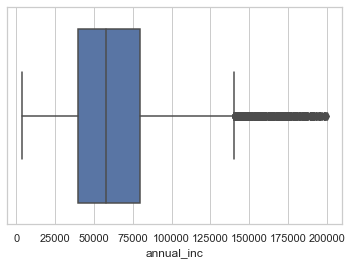

In [45]:
loan_fc = loan_fc[loan_fc.annual_inc < 200000]
sns.boxplot(data = loan_fc, x='annual_inc')

##### Interest Rate

In [46]:
loan_fc.int_rate.describe()

count   37888.00
mean       11.91
std         3.68
min         5.42
25%         8.94
50%        11.71
75%        14.35
max        24.40
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

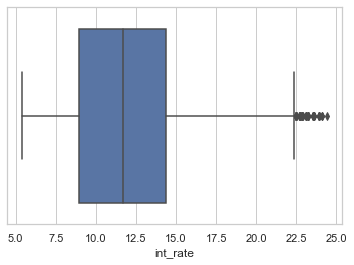

In [47]:
sns.boxplot(x=loan_fc.int_rate)

*Interest Rate don't have extreme outliers.*

##### Relation between other numerical variables

<AxesSubplot:>

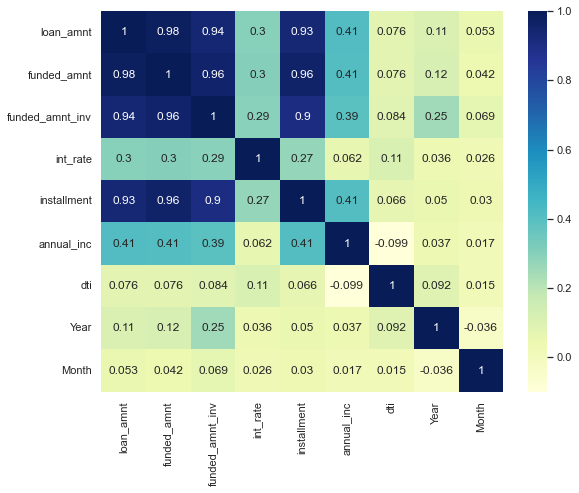

In [48]:
plt.figure(figsize=[9,7])
sns.heatmap(data=loan_fc.corr(), annot=True, cmap="YlGnBu")

*Observations:*
 - *loan_amnt, funded_amnt and funded_amnt_inv are closely correlated*
 - *installment is also highly correlated with loan_amnt, funded_amnt and funded_amnt_inv*
 - *annual_inc also share some correlation with loan_amnt, funded_amnt and funded_amnt_inv and installment*
 - *annual_inc shares a negative correlation with dti i.e if annual income is low, DTI is high*
 - *funded_amnt_inv have some correlation with Year*

### Univariate Analysis

##### Compare the 3 amounts - loan_amnt, funded_amnt, and funded_amnt_inv

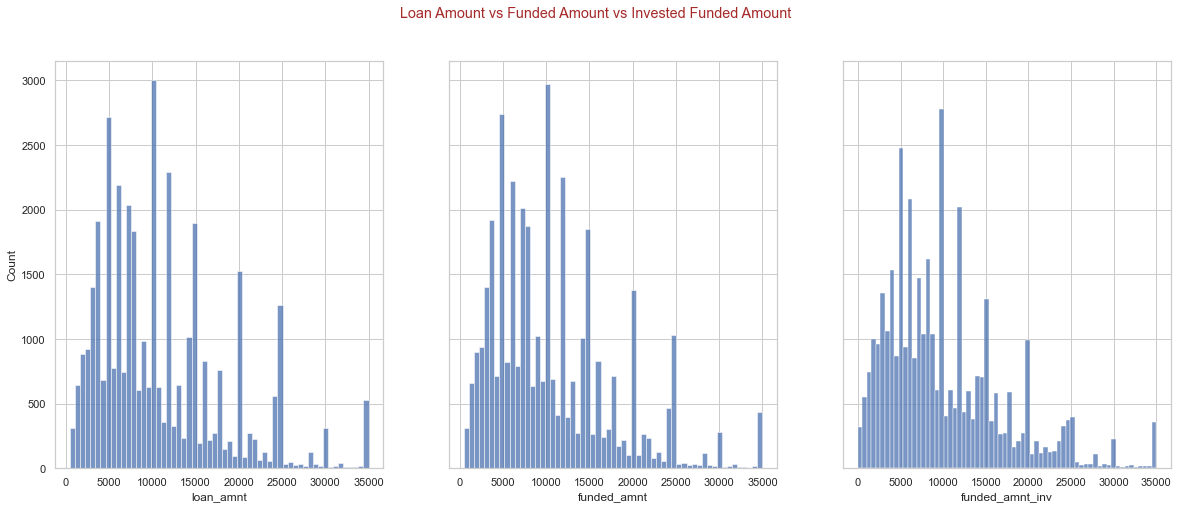

In [49]:
# Create multiple subplots.
# Add multiple plots to the same graph

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 7.5))

# create histplot in each subplot
sns.histplot(data=loan_fc, x='loan_amnt', ax=axes[0])
sns.histplot(data=loan_fc, x='funded_amnt', ax=axes[1])
sns.histplot(data=loan_fc, x='funded_amnt_inv', ax=axes[2])

fig.suptitle('Loan Amount vs Funded Amount vs Invested Funded Amount',
             fontdict={'fontsize': 75, 'fontweight': 15, 'color': 'brown'})

plt.show()

*Observations:*
- *All 3 amounts have similar distribution*
- *As all 3 are highly correlated (as seen earlier), we could stick with 'loan_amnt' for the rest of our analysis.*

##### Univariate Analysis on Loan Status

In [50]:
loan_fc["loan_status"].value_counts(normalize=True)*100

Fully Paid    85.34
Charged Off   14.66
Name: loan_status, dtype: float64

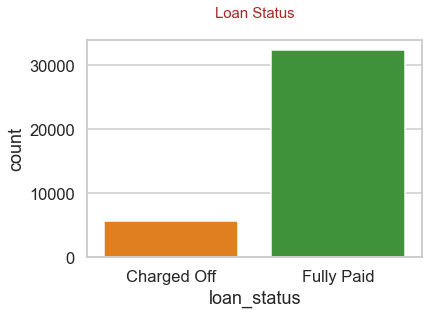

In [51]:
import matplotlib.style as style
sns.set_context('talk') 

sns.countplot(data=loan_fc, x='loan_status', palette=("Paired_r"))

plt.title('Loan Status\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})

plt.show()

*Observation:*
 - *85.4% of applicants paid their full loan while 14.6% were defaulters*

##### Univariate Analysis on Loan Amount

In [52]:
loan_fc.loan_amnt.value_counts().head()

10000    2773
12000    2213
5000     2010
6000     1871
15000    1796
Name: loan_amnt, dtype: int64

In [53]:
loan_fc.loan_amnt.describe()

count   37888.00
mean    10902.73
std      7223.89
min       500.00
25%      5125.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

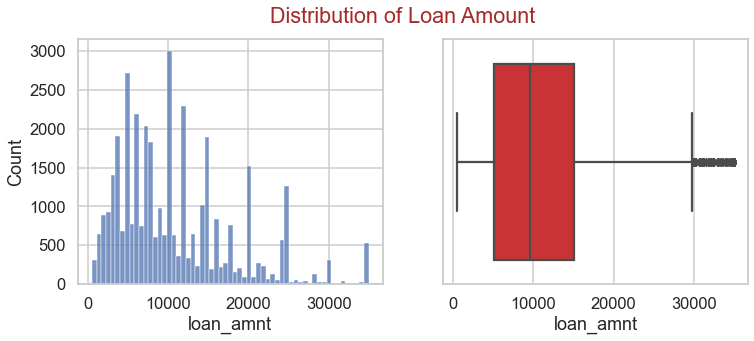

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

sns.histplot(data=loan_fc, x='loan_amnt', ax=axes[0], palette=("Paired_r"))
sns.boxplot(data=loan_fc, x='loan_amnt', ax=axes[1], palette=("Paired_r"))

fig.suptitle('Distribution of Loan Amount',
             fontdict={'color': 'brown'})

plt.show()

*Observation*
 - *Loans for 10,000 USD have been the highest followed by 12,000 and 5,000 USD*
 - *Loans between 5,000-15,000 USD range have been applied for the most*

##### Univariate Analysis on Annual Income

In [55]:
loan_fc.annual_inc.value_counts().head()

60000.00    1466
50000.00    1029
40000.00     855
45000.00     811
30000.00     808
Name: annual_inc, dtype: int64

In [56]:
loan_fc.annual_inc.describe()

count    37888.00
mean     64157.79
std      32803.17
min       4000.00
25%      40000.00
50%      57855.00
75%      80000.00
max     199992.00
Name: annual_inc, dtype: float64

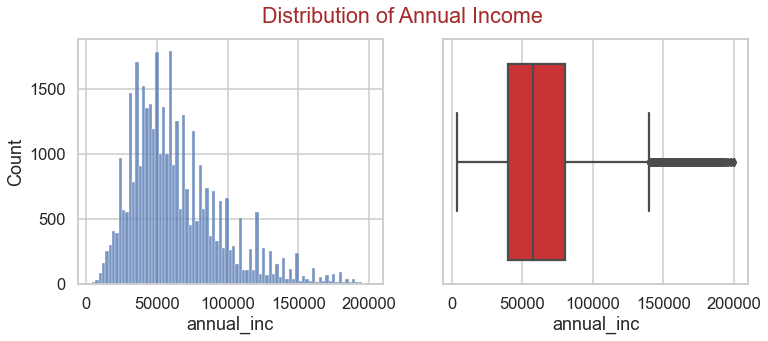

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
sns.histplot(data=loan_fc, x='annual_inc', ax=axes[0], palette=("Paired_r"))
sns.boxplot(data=loan_fc, x='annual_inc', ax=axes[1], palette=("Paired_r"))

fig.suptitle('Distribution of Annual Income',
             fontdict={'color': 'brown'})

plt.show()

*Observation:*
 - *Applicants with an annual income of 60,000 USD have been the highest followed by 50,000 and 40,000 USD*
 - *Most of the borrowers have annual incomes between 40,000-80,000 USD*

##### Univariate Analysis on Interest Rate

In [58]:
loan_fc.int_rate.value_counts().head()

10.99    895
7.51     780
11.49    779
13.49    740
7.88     713
Name: int_rate, dtype: int64

In [59]:
loan_fc.int_rate.describe()

count   37888.00
mean       11.91
std         3.68
min         5.42
25%         8.94
50%        11.71
75%        14.35
max        24.40
Name: int_rate, dtype: float64

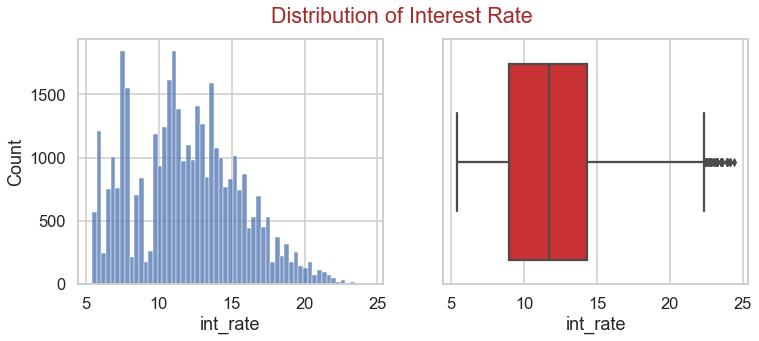

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))
sns.histplot(data=loan_fc, x='int_rate', ax=axes[0], palette=("Paired_r"))
sns.boxplot(data=loan_fc, x='int_rate', ax=axes[1], palette=("Paired_r"))

fig.suptitle('Distribution of Interest Rate',
             fontdict={'color': 'brown'})

plt.show()

*Observation:*
 - *10.99% is the most common interest rate*
 - *Interest rates usually varies between 8.94% and 14.35%*

##### Univariate Analysis on Purpose

In [61]:
(loan_fc.purpose.value_counts(normalize=True)*100).head()

debt_consolidation   47.00
credit_card          13.06
other                10.02
home_improvement      7.26
major_purchase        5.57
Name: purpose, dtype: float64

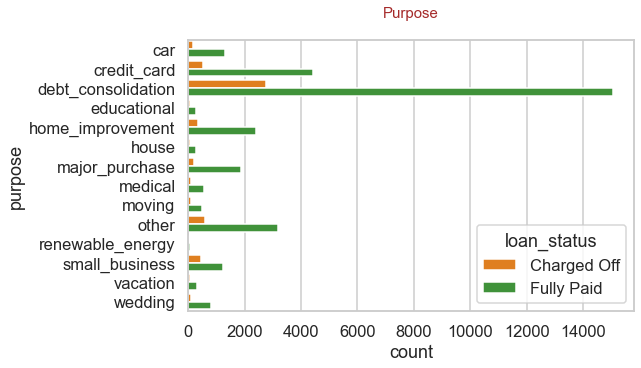

In [62]:
plt.figure(figsize=[8,5])

# sns.set_theme(style="darkgrid")
sns.color_palette("mako", as_cmap=True)

sns.countplot(data=loan_fc, y='purpose', hue='loan_status', palette=("Paired_r"))

plt.title('Purpose\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observation:*
 - *47% of borrowers have applied for loans for the purpose of 'Debt Consolidation' and 13% have asked loans to pay their for Credit Cards*
 - *Defaulters are highest for loans for 'Debt Consolidation'*

##### Univariate Analysis on Home Ownership

In [63]:
(loan_fc.home_ownership.value_counts(normalize=True)*100).head()

RENT       48.39
MORTGAGE   43.62
OWN         7.73
OTHER       0.25
NONE        0.01
Name: home_ownership, dtype: float64

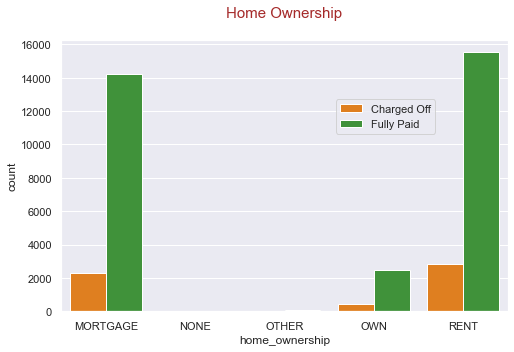

In [201]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.countplot(data=loan_fc, x='home_ownership', hue='loan_status', palette=("Paired_r"))

plt.title('Home Ownership\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.legend(bbox_to_anchor = (0.85, 0.8))
plt.show()

*Observation:*
 - *People who own houses have the lowest default rate*
 - *Borrowers in Rental homes and those with mortgages have higher chances of not paying their loans*

##### Univariate Analysis on Year

In [65]:
loan_fc.Year.value_counts()

2011    20153
2010    11332
2009     4625
2008     1538
2007      240
Name: Year, dtype: int64

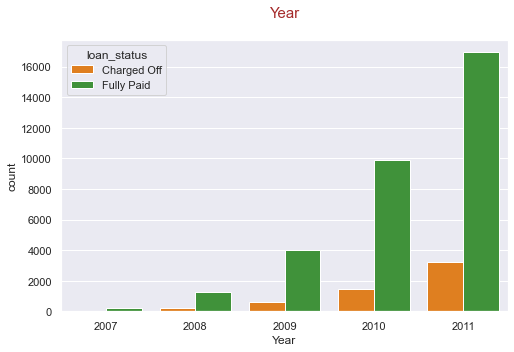

In [66]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.countplot(data=loan_fc, x='Year', hue='loan_status', palette=("Paired_r"))

plt.title('Year\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - *The amount of loans applied has increased over the years*
 - *In the year 2007, 240 loans have been applied while in 2011 it crossed 20,000*
 - *Increase in loans also means increase in defaulters*

##### Univariate Analysis on Term

In [67]:
loan_fc.term.value_counts(normalize=True)*100

 36 months   75.50
 60 months   24.50
Name: term, dtype: float64

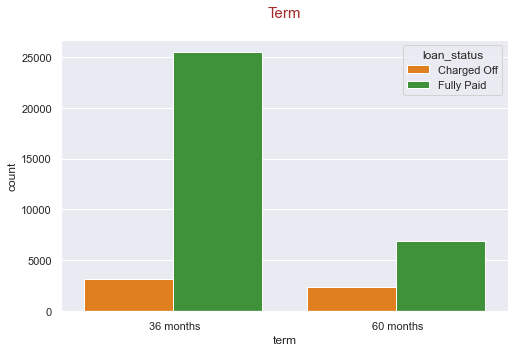

In [68]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.countplot(data=loan_fc, x='term', hue='loan_status', palette=("Paired_r"))

plt.title('Term\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - *75.5% of the loans were for a term of 36 months while the rest 24.5% were for 60 months term*
 - *Defaulters were also slightly higher when the term is 36 months*

##### Univariate Analysis on Employment Length

In [192]:
loan_fc.emp_length.value_counts(normalize=True)*100

10+ years       21.80
< 1 year        11.73
2 years         11.12
3 years         10.44
4 years          8.68
5 years          8.31
1 year           8.25
6 years          5.63
7 years          4.45
8 years          3.70
9 years          3.19
Not Available    2.70
Name: emp_length, dtype: float64

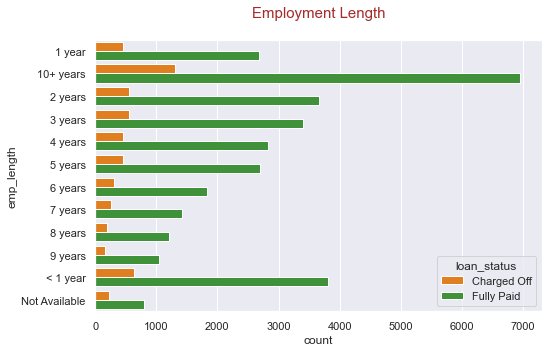

In [194]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.countplot(data=loan_fc, y='emp_length', hue='loan_status', palette=("Paired_r"))

plt.title('Employment Length\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - *Borrowers with over 10 years of employment have applied for the most loans*
 - *Interestingly, there's a high amount of loans from borrowers with less than a year of employment*

##### Univariate Analysis on Verification Status

In [196]:
loan_fc.verification_status.value_counts(normalize=True)*100

Not Verified      43.66
Verified          31.35
Source Verified   24.99
Name: verification_status, dtype: float64

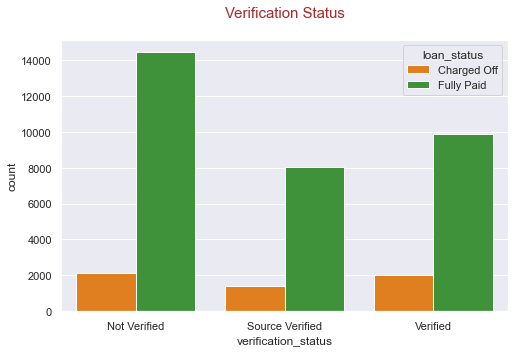

In [197]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.countplot(data=loan_fc, x='verification_status', hue='loan_status', palette=("Paired_r"))

plt.title('Verification Status\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - *Most loans were from applicants with no income verified*

### Bivariate Analysis

*To compare charged-off values against another variable, calculate the ratio of charged-off values and then compare it against each variable of interest.*

##### Bivariate Analysis - Annual Income and Defaulter Rate

In [150]:
df_income_vs_defaulter_ratio = pd.crosstab(loan_fc.annual_inc_category, loan_fc.loan_status)
df_income_vs_defaulter_ratio.reset_index(inplace=True)
df_income_vs_defaulter_ratio['Defaulter_Ratio'] = df_income_vs_defaulter_ratio['Charged Off']/df_income_vs_defaulter_ratio.sum(axis=1)
df_income_vs_defaulter_ratio

loan_status,annual_inc_category,Charged Off,Fully Paid,Defaulter_Ratio
0,0-20k,237,943,0.20
1,20k-40k,1514,7004,0.18
2,40k-60k,1729,9534,0.15
3,60k-80k,1024,6597,0.13
4,80k+,1052,8254,0.11


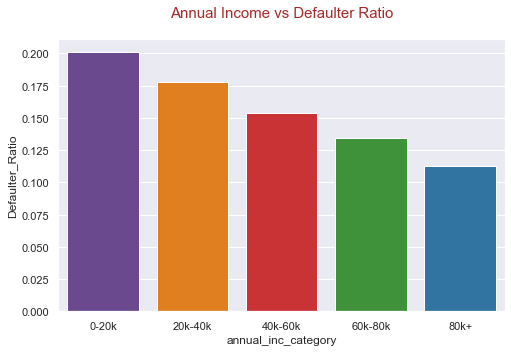

In [151]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_income_vs_defaulter_ratio, x='annual_inc_category', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Annual Income vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - Income range 80000+  has low number of defaulters.
 - People with income range between 0-20k have a high chances of becoming defaulters.
 - As annual income rises, the defaulter rate reduces.

##### Bivariate Analysis - Purpose and Defaulter Rate

In [152]:
df_purpose_vs_defaulter_ratio = pd.crosstab(loan_fc.purpose, loan_fc.loan_status)
df_purpose_vs_defaulter_ratio.reset_index(inplace=True)
df_purpose_vs_defaulter_ratio['Defaulter_Ratio'] = df_purpose_vs_defaulter_ratio['Charged Off']/df_purpose_vs_defaulter_ratio.sum(axis=1)
df_purpose_vs_defaulter_ratio.sample(5)

loan_status,purpose,Charged Off,Fully Paid,Defaulter_Ratio
2,debt_consolidation,2745,15063,0.15
13,wedding,94,816,0.10
8,moving,90,477,0.16
12,vacation,53,322,0.14
6,major_purchase,220,1891,0.10


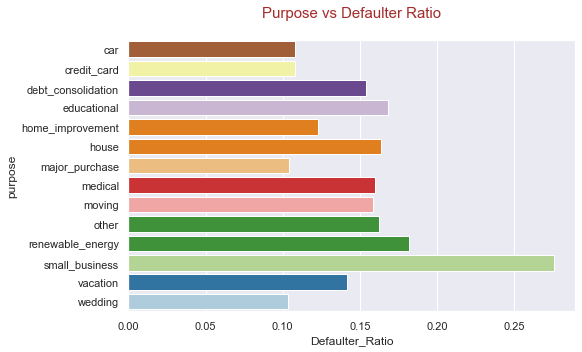

In [153]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_purpose_vs_defaulter_ratio, y='purpose', x='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Purpose vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
# plt.xticks(rotation=90)
plt.show()

*Observations:*
 - Loans for Small Business have high chances of defaulting.

##### Bivariate Analysis - Grade and Defaulter Rate

In [154]:
df_grade_vs_defaulter_ratio = pd.crosstab(loan_fc.grade, loan_fc.loan_status)
df_grade_vs_defaulter_ratio.reset_index(inplace=True)
df_grade_vs_defaulter_ratio['Defaulter_Ratio'] = df_grade_vs_defaulter_ratio['Charged Off']/df_grade_vs_defaulter_ratio.sum(axis=1)
df_grade_vs_defaulter_ratio.sample(5)

loan_status,grade,Charged Off,Fully Paid,Defaulter_Ratio
2,C,1338,6356,0.17
5,F,309,629,0.33
4,E,699,1885,0.27
3,D,1106,3879,0.22
0,A,600,9326,0.06


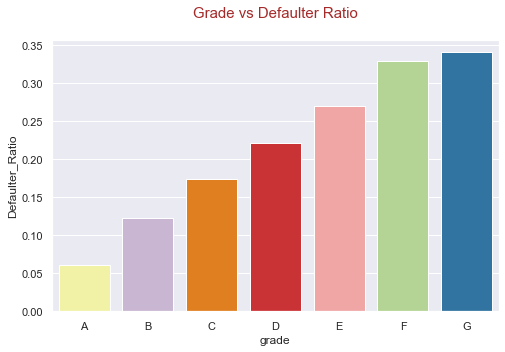

In [155]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_grade_vs_defaulter_ratio, x='grade', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Grade vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - Grade "F" and "G" have very high chances of defaulting
 - Grade "A" has the lowest defaulter ratio
 - Chances of defaulting increases from grade "A" to "G"

##### Bivariate Analysis - Sub Grade and Defaulter Rate

In [156]:
df_sub_grade_vs_defaulter_ratio = pd.crosstab(loan_fc.sub_grade, loan_fc.loan_status)
df_sub_grade_vs_defaulter_ratio.reset_index(inplace=True)
df_sub_grade_vs_defaulter_ratio['Defaulter_Ratio'] = df_sub_grade_vs_defaulter_ratio['Charged Off']/df_sub_grade_vs_defaulter_ratio.sum(axis=1)
df_sub_grade_vs_defaulter_ratio.sample(5)

loan_status,sub_grade,Charged Off,Fully Paid,Defaulter_Ratio
3,A4,178,2663,0.06
9,B5,354,2221,0.14
30,G1,31,61,0.34
5,B1,170,1601,0.10
24,E5,104,260,0.29


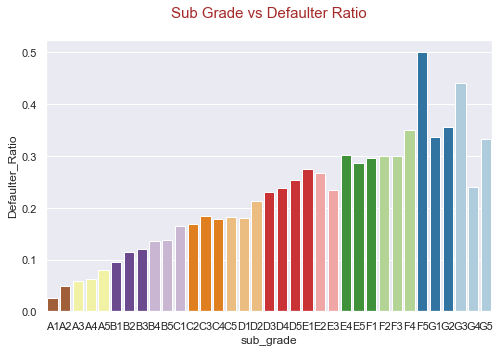

In [157]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_sub_grade_vs_defaulter_ratio, x='sub_grade', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Sub Grade vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*<br>
*The inferences are near identical to using grade*
 - Grade "F" and "G" have very high chances of defaulting with sub grade "F5" having the highest default ratio
 - Grade "A" has the lowest defaulter ratio
 - Chances of defaulting increases from grade "A" to "G"

##### Grade vs Interest Rate

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

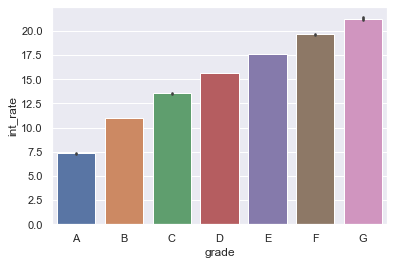

In [191]:
sns.barplot(data=loan_fc, x='grade', y='int_rate')

*Observation:*
 - As Grades increases, the interest rates also increases.
 - This explains why there's a high amount of defaulters in grades, "F" and "G"

##### Bivariate Analysis - Interest Rate and Defaulter Rate

In [158]:
df_int_rate_vs_defaulter_ratio = pd.crosstab(loan_fc.int_rate_category, loan_fc.loan_status)
df_int_rate_vs_defaulter_ratio.reset_index(inplace=True)
df_int_rate_vs_defaulter_ratio['Defaulter_Ratio'] = df_int_rate_vs_defaulter_ratio['Charged Off']/df_int_rate_vs_defaulter_ratio.sum(axis=1)
df_int_rate_vs_defaulter_ratio.sample(5)

loan_status,int_rate_category,Charged Off,Fully Paid,Defaulter_Ratio
1,5-10,985,6656,0.13
0,0-5,577,4100,0.12
2,10-15,1386,8094,0.15
4,20+,1202,5974,0.17
3,15-20,1378,7362,0.16


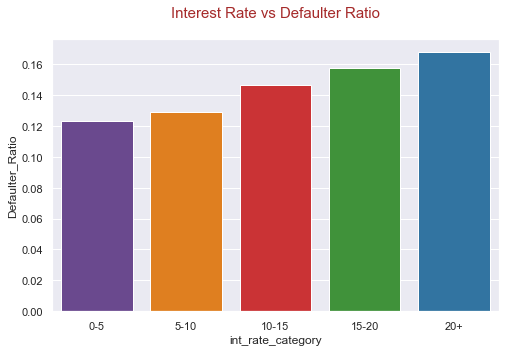

In [159]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_int_rate_vs_defaulter_ratio, x='int_rate_category', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Interest Rate vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - Higher interest rates attract high possibility of defaulting
 - Interest Rates of 20% and above have the highest default rate
 - Interest rates of 15% and above have high default rates
 - Interest Rates of 10% or below have the lowest default rate

##### Bivariate Analysis - Employment Length and Defaulter Rate

In [160]:
df_emp_length_vs_defaulter_ratio = pd.crosstab(loan_fc.emp_length, loan_fc.loan_status)
df_emp_length_vs_defaulter_ratio.reset_index(inplace=True)
df_emp_length_vs_defaulter_ratio['Defaulter_Ratio'] = df_emp_length_vs_defaulter_ratio['Charged Off']/df_emp_length_vs_defaulter_ratio.sum(axis=1)
df_emp_length_vs_defaulter_ratio

loan_status,emp_length,Charged Off,Fully Paid,Defaulter_Ratio
0,1 year,454,2673,0.15
1,10+ years,1306,6952,0.16
2,2 years,560,3655,0.13
3,3 years,550,3405,0.14
4,4 years,455,2833,0.14
5,5 years,452,2695,0.14
6,6 years,303,1830,0.14
7,7 years,262,1425,0.16
8,8 years,200,1202,0.14
9,9 years,156,1051,0.13


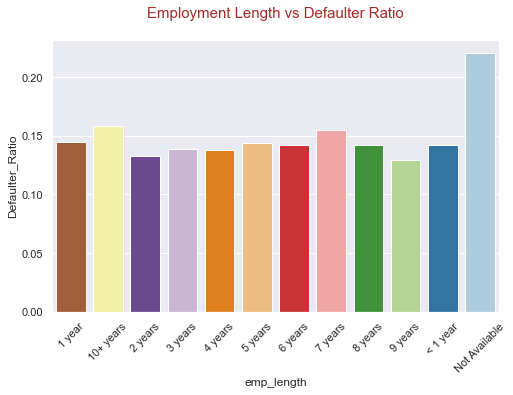

In [161]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_emp_length_vs_defaulter_ratio, x='emp_length', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Employment Length vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.xticks(rotation=45)
plt.show()

*Observation:*
 - People with less than 1 year of employment and 10+ years of employment both have high chances for defaulting
 - There's not much difference in defaulter rate between other employment lengths

##### Bivariate Analysis - State and Defaulter Rate

In [164]:
df_state_vs_defaulter_ratio = pd.crosstab(loan_fc.addr_state, loan_fc.loan_status)
df_state_vs_defaulter_ratio.reset_index(inplace=True)
df_state_vs_defaulter_ratio['Defaulter_Ratio'] = df_state_vs_defaulter_ratio['Charged Off']/df_state_vs_defaulter_ratio.sum(axis=1)
df_state_vs_defaulter_ratio.sample(5)

loan_status,addr_state,Charged Off,Fully Paid,Defaulter_Ratio
9,FL,496,2241,0.18
33,NY,486,3119,0.13
42,TX,308,2298,0.12
3,AZ,120,713,0.14
46,WA,127,679,0.16


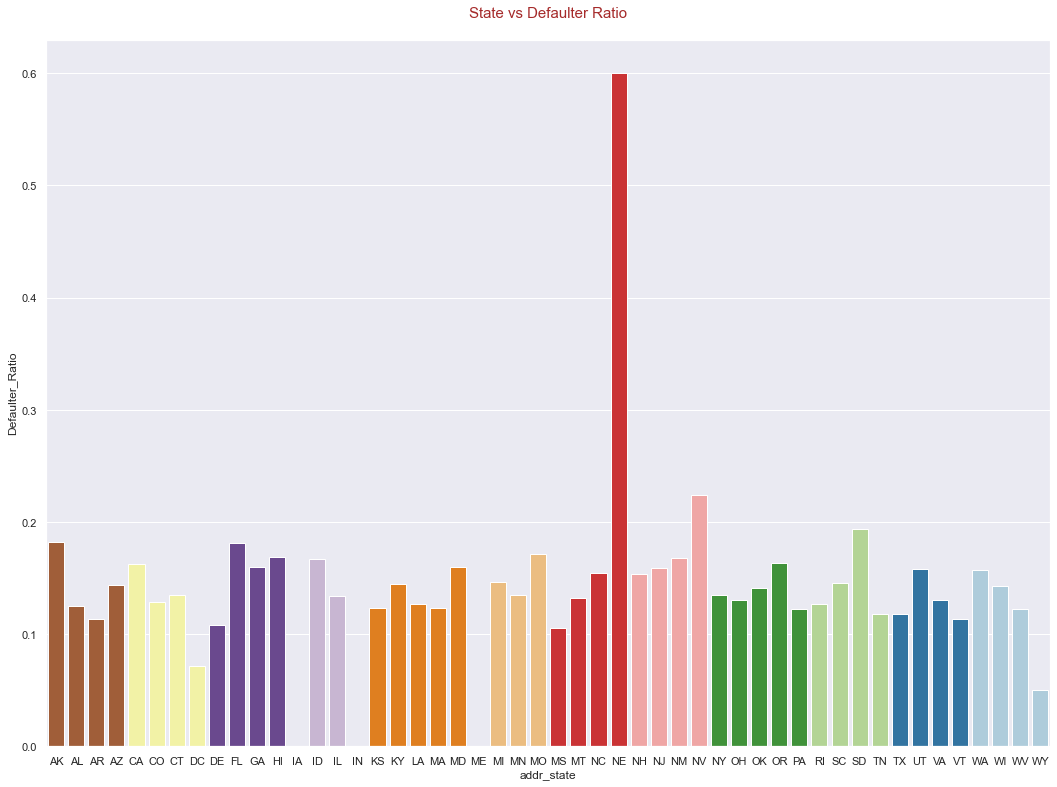

In [170]:
plt.figure(figsize=[18,13])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_state_vs_defaulter_ratio, x='addr_state', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('State vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - Borrowers from the state of 'NE' have the highest default rate
 - States, 'NV', 'SD', 'AK' and 'FL' also have high default rates compared to other states

##### Bivariate Analysis - Verification Status and Defaulter Rate

In [183]:
df_ver_vs_defaulter_ratio = pd.crosstab(loan_fc.verification_status, loan_fc.loan_status)
df_ver_vs_defaulter_ratio.reset_index(inplace=True)
df_ver_vs_defaulter_ratio['Defaulter_Ratio'] = df_ver_vs_defaulter_ratio['Charged Off']/df_ver_vs_defaulter_ratio.sum(axis=1)
df_ver_vs_defaulter_ratio

loan_status,verification_status,Charged Off,Fully Paid,Defaulter_Ratio
0,Not Verified,2121,14420,0.13
1,Source Verified,1415,8055,0.15
2,Verified,2020,9857,0.17


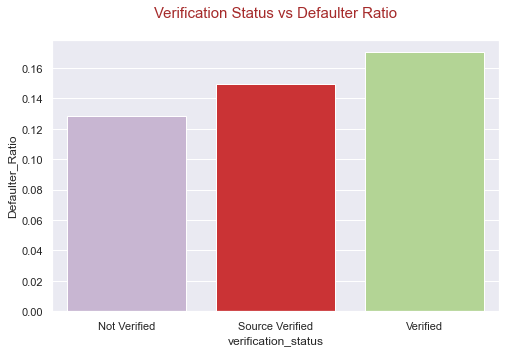

In [185]:
plt.figure(figsize=[8,5])

sns.set_theme(style="darkgrid")
sns.barplot(data=df_ver_vs_defaulter_ratio, x='verification_status', y='Defaulter_Ratio', palette=("Paired_r"))

plt.title('Verification Status vs Defaulter Ratio\n', fontdict={'fontsize':15, 'fontweight':10, 'color':'brown'})
plt.show()

*Observations:*
 - Borrowers with their incomes verified have the highest default rate
 - Maybe further analysis is required to prove this